<a href="https://colab.research.google.com/github/mehdifa1372/Python-/blob/main/logestic_regression_for_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# load the mnist dataset

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# the data is image, so we need to flatten the images to make it as a vector
# reshape the data as a vector

X_train  = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

X_train.dtype

dtype('float32')

In [12]:
first_input = X_train[0]
first_input.shape
print(first_input.min())
print(first_input.max())

0.0
255.0


In [19]:
# normalization of the data between 0 and 1
from sklearn.preprocessing import minmax_scale, StandardScaler

scaler_minmax = minmax_scale(X_train)
scaler_satndard = StandardScaler()


X_train = minmax_scale(X_train)
X_test = minmax_scale(X_test)

print(X_train.min())
print(X_train.max())

0.0
1.0


In [26]:
# now the logistic regression model is ready to be developed

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(
    max_iter=1000,                # Maximum iterations
)
log_reg_model.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

In [29]:
# Step 7: Predict and Evaluate the Model on Test Data
y_pred = log_reg_model.predict(X_test)


# Step 8: Calculate Accuracy and Print Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000


Confusion Matrix:
[[ 957    0    1    4    1    9    4    3    1    0]
 [   0 1111    4    2    0    2    3    2   11    0]
 [   6    9  929   16   10    3   12    9   34    4]
 [   4    1   17  9

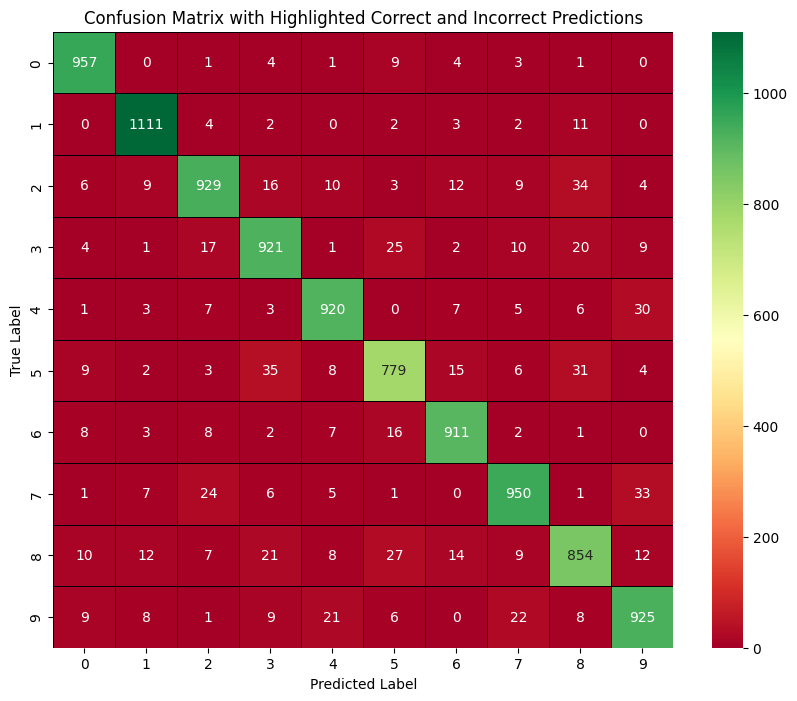

In [32]:
# Step 9: Plot a Fancy Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlGn', linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix with Highlighted Correct and Incorrect Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()